## This script will fit a linear regression model to the specified data set, correlation coefficient, the mean squared error, and create a final scatter plot.

In [1]:
# Load libraries
library(ggplot2)

In [4]:
# Describe data
filename <- "regression_data-Copy1.csv"
x <- "YearsExperience"
y <- "Salary"

In [5]:
# Read in the data
df <- read.csv(filename)

In [6]:
# Fit model to data
model <- lm(as.formula(paste(y, "~", x)), data = df)
slope <- coef(model)[2]
intercept <- coef(model)[1]
r <- cor(df[[x]], df[[y]])
pred <- predict(model)
mse <- mean((df[[y]] - pred)^2)

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
Warning message in max(df$y):
“no non-missing arguments to max; returning -Inf”
`geom_smooth()` using formula = 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using formula = 'y ~ x'


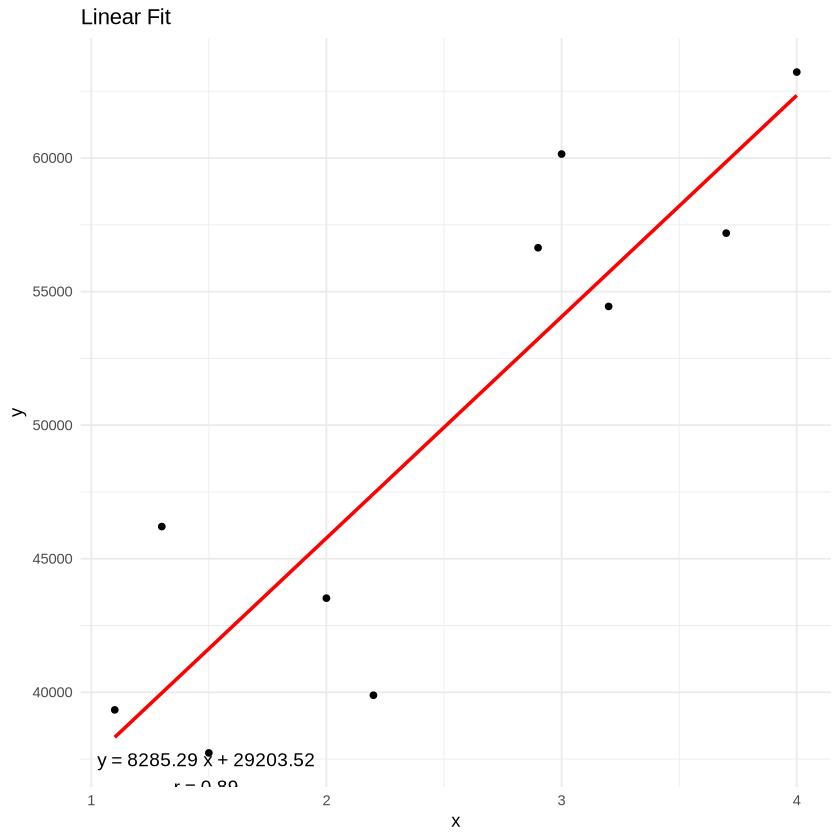

In [7]:
# Plot the data
ggplot(df, aes_string(x = x, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  annotate("text", x = 1.5, y = max(df$y) - 0.5,
           label = paste("y =", round(slope, 2), "x +", round(intercept, 2),
                         "\nr =", round(r, 2), "\nMSE =", round(mse, 2)),
           size = 4) +
  labs(title = "Linear Fit",
       x = "x", y = "y") +
  theme_minimal()
ggsave("regression_plot_r.png")